In [1]:
from nbloader import Notebook

In [3]:
big_analysis = Notebook('stream_analysis/big_analysis.ipynb')
big_analysis.run_all()

630
630
630
630
630


<Figure size 1600x1000 with 1 Axes>

<Figure size 1600x1000 with 1 Axes>

<Figure size 1600x1000 with 1 Axes>

{'combined_results_2/combined.n1000000b128c1328.results': [1026.8398791540785], 'combined_results_2/combined.n1000000b256c1328.results': [1328.0], 'combined_results_2/combined.n1000000b512c1328.results': [1328.0], 'combined_results_2/combined.n1000000b1024c1328.results': [1328.0], 'combined_results_2/combined.n2000000b128c1328.results': [1328.0], 'combined_results_2/combined.n2000000b256c1328.results': [1328.0], 'combined_results_2/combined.n2000000b512c1328.results': [1328.0], 'combined_results_2/combined.n2000000b1024c1328.results': [1328.0], 'combined_results_2/combined.n3000000b128c1328.results': [1328.0], 'combined_results_2/combined.n3000000b256c1328.results': [1328.0], 'combined_results_2/combined.n3000000b512c1328.results': [1328.0], 'combined_results_2/combined.n3000000b1024c1328.results': [1328.0], 'combined_results_2/combined.n4000000b128c1328.results': [1328.0], 'combined_results_2/combined.n4000000b256c1328.results': [1328.0], 'combined_results_2/combined.n4000000b512c1328

<Figure size 1600x1000 with 1 Axes>

<Figure size 1600x1000 with 1 Axes>

538


<Figure size 640x480 with 3 Axes>

In [8]:
power_results = big_analysis.ns['results_organized']
rate_results = big_analysis.ns['rates_organized']
time_results = big_analysis.ns['times_organized']

In [13]:
for key_power,value_power in power_results.items():
    for key_time, value_time in time_results.items():
        power_label = (key_power.split('/')[1].split('.')[1])
        time_label = (key_time.split('/')[1].split('.')[1])
        if power_label == time_label:
            value_power.append(value_time)
print(value_power)
        

[116.34145884270593, [0.0002305025]]


In [16]:
print(power_results)

{'combined_results_2/combined.n1000000b128c1328.results': [92.77728700906354, [2.7452500000000002e-05]], 'combined_results_2/combined.n1000000b256c1328.results': [101.03122222222188, [2.8222499999999996e-05]], 'combined_results_2/combined.n1000000b512c1328.results': [102.3298702064897, [2.80175e-05]], 'combined_results_2/combined.n1000000b1024c1328.results': [101.67564417177897, [2.7755e-05]], 'combined_results_2/combined.n2000000b128c1328.results': [119.68557476635536, [4.57125e-05]], 'combined_results_2/combined.n2000000b256c1328.results': [122.04522518159824, [4.5855e-05]], 'combined_results_2/combined.n2000000b512c1328.results': [120.39639344262261, [4.64175e-05]], 'combined_results_2/combined.n2000000b1024c1328.results': [119.79720853080562, [4.66675e-05]], 'combined_results_2/combined.n3000000b128c1328.results': [134.7219878787885, [6.444750000000001e-05]], 'combined_results_2/combined.n3000000b256c1328.results': [133.80585395537534, [6.49525e-05]], 'combined_results_2/combined.n

In [17]:
import re
import math
import csv

with open('second_all.csv', 'w', newline='') as csvfile:
    fieldnames = ['Power', 'Rate', 'Time','Clock', 'Block Size', 'Threads', 'Array Size']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for key_power,value_power in power_results.items():
        for key_rate, value_rate in rate_results.items():
                power_label = (key_power.split('/')[1].split('.')[1])
                rate_label = (key_rate.split('/')[1].split('.')[1])
                if power_label == rate_label:
                    all_data = re.findall('\d+', power_label)
                    num_threads = math.floor(int(all_data[0])/int(all_data[1]))
                    writer.writerow({'Power':value_power[0], 'Rate':value_rate[0],'Time':value_power[1][0], 'Clock':all_data[2], 'Block Size':all_data[1], 'Threads':num_threads, 'Array Size':all_data[0]})

In [20]:
import pandas as pd
file_path = 'second_all.csv'
df = pd.read_csv(file_path, sep=',')
print (df.head())

        Power           Rate      Time  Clock  Block Size  Threads  Array Size
0   92.777287  361268.687952  0.000027   1328         128     7812     1000000
1  101.031222  351280.545865  0.000028   1328         256     3906     1000000
2  102.329870  353926.864299  0.000028   1328         512     1953     1000000
3  101.675644  357442.622735  0.000028   1328        1024      976     1000000
4  119.685575  434637.304783  0.000046   1328         128    15625     2000000


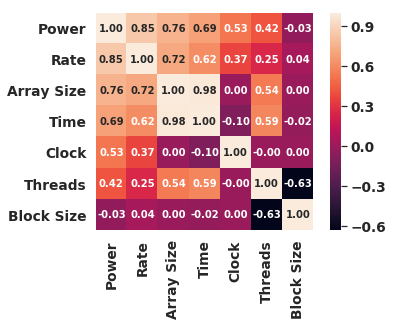

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import random
corrmat = df.corr()
k = 7
cols = corrmat.nlargest(k, "Power")["Power"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
import pickle as pkl
%matplotlib inline

In [33]:
X = df[['Rate', 'Array Size', 'Time', 'Clock', 'Threads', 'Block Size']]
y = df['Power']
print ("X size:", X.shape)
print ('y size:', y.shape)

X size: (2520, 6)
y size: (2520,)


In [35]:
model = GridSearchCV(RandomForestRegressor(n_estimators=100),
                     param_grid=dict(max_features=range(2,6)),
                     scoring='neg_mean_squared_error',
                    cv=10)

In [36]:
model.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(2, 6)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Text(0,0.5,'RMSD')

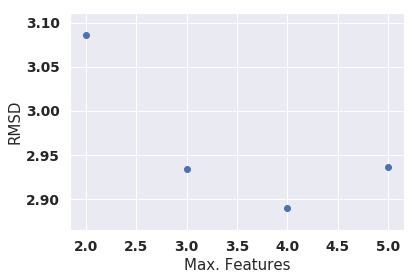

In [37]:
fig, ax = plt.subplots()
ax.scatter(model.cv_results_['param_max_features'].data,
          np.sqrt(-1 * model.cv_results_['mean_test_score']))
ax.set_xlabel('Max. Features')
ax.set_ylabel('RMSD')

In [38]:
model = model.best_estimator_

## Rate has biggest feature importance

In [39]:
list(zip(X.columns,model.feature_importances_))

[('Rate', 0.49933390797425836),
 ('Array Size', 0.19446052458135923),
 ('Time', 0.07760194268751482),
 ('Clock', 0.22208693306045796),
 ('Threads', 0.004246392614620023),
 ('Block Size', 0.0022702990817897416)]

## Estimating Prediction Accuracy

In [40]:
all_y_test = np.zeros((0,))
all_y_pred = np.zeros((0,))
#given options and list of data, returns the indices of training and test sets 
for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
    # Split off the train and test set
    X_test, y_test = X.iloc[test_inds, :], y[test_inds]
    X_train, y_train = X.iloc[train_inds, :], y[train_inds]
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Append the results
    all_y_test = np.concatenate((all_y_test, y_test))
    #print (all_y_test)
    all_y_pred = np.concatenate((all_y_pred, y_pred))

In [41]:
print ("R:", sp.stats.pearsonr(all_y_test, all_y_pred)[0])
print ("MAE:", np.abs(all_y_test - all_y_pred).mean(), 'Watts')
print ("RMSE:", np.sqrt(np.power(all_y_test - all_y_pred, 2).mean()), 'Watts')

R: 0.9990798265969429
MAE: 0.6145696104567787 Watts
RMSE: 0.8578916608343155 Watts


## Plotting results of prediction vs results

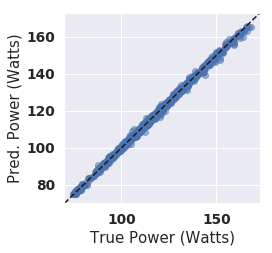

In [42]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(all_y_test, all_y_pred, alpha=0.5)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Power (Watts)')
ax.set_ylabel('Pred. Power (Watts)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

## Training the model and saving it

In [44]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [45]:
pkl.dump(model, open('power_predict_model.pkl', 'wb'))

In [46]:
with open ("power_predict_model.pkl", 'rb') as fp:
    model2 = pkl.load(fp)
print (model2)
model2.predict([[361270,0.000033,1328,128,7812,1000000]])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


array([88.80482254])